In [1]:
import pandas as pd

from lib.torch_helper import (
    StockTrainer, get_stock_data
)

In [2]:
# Configuration
amd = get_stock_data(
    "amd", column_filter=["High", "Low", "Close", "Volume", "Date"])

spy = get_stock_data(
    "spy", column_filter=["High", "Low", "Close", "Volume", "Date"])

stock_data = pd.concat([amd, spy]).reset_index(drop=True)
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

stock_data

,High,Low,Close,Volume,Date,Ticker,EFFR,UMCSENT,UNRATE,VIX,USDX,time_idx,ATR,RSI,MACD
0,6.040000,5.670000,5.830000,27347200,2008-06-30,AMD,2.47,59.8,5.4,23.950001,72.459999,0,0.415000,28.321687,0.212831
1,5.820000,5.400000,5.650000,32866100,2008-07-01,AMD,2.11,61.2,5.8,23.650000,72.370003,1,0.415000,28.321687,0.212831
2,5.840000,5.420000,5.440000,24019300,2008-07-02,AMD,1.95,61.2,5.8,25.920000,72.029999,2,0.415000,28.321687,0.212831
3,5.550000,5.010000,5.300000,24320100,2008-07-03,AMD,1.92,61.2,5.8,24.780001,72.739998,3,0.415000,28.321687,0.212831
4,5.670000,5.220000,5.380000,25813600,2008-07-07,AMD,1.99,61.2,5.8,25.780001,72.669998,4,0.415000,28.321687,0.212831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,438.369995,435.029999,437.179993,76160400,2023-06-20,SPY,5.07,62.0,3.7,13.880000,102.540001,3766,4.525052,69.033502,1.201103
7538,436.989990,434.329987,434.940002,76982300,2023-06-21,SPY,5.07,62.0,3.7,13.200000,102.070000,3767,4.405406,64.644155,0.746781
7539,436.619995,433.600006,436.510010,70637200,2023-06-22,SPY,5.07,62.0,3.7,12.910000,102.389999,3768,4.306447,66.263289,0.469458
7540,435.059998,432.470001,433.209991,92028700,2023-06-23,SPY,5.07,62.0,3.7,13.440000,102.900002,3769,4.287416,60.039457,0.005748


In [4]:
trainer = StockTrainer(
    stock_data,
    group_id="Ticker",
    target="Close",
    train_on=[
        # "Imp Vol", "Put/Call Vol", "Options Vol", "Put/Call OI", "EFFR",
        "UMCSENT", "UNRATE", "USDX", "VIX", "Close", "Volume",
        "ATR", "RSI", "MACD"
    ],
    batch_size=64,
    max_epoch=50,
    learning_rate=0.001059429134884675
)
trainer.create_model()

In [5]:
hyper_params = {
    "gradient_clip_val": 0.05130328983794089,
    "hidden_size": 97,
    "dropout": 0.20191453684086638,
    "hidden_continuous_size": 61,
    "attention_head_size": 2,
    "learning_rate": 0.015631929305749356,
    "optimizer": "Ranger"
}

trainer.train(**hyper_params)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 2     
3  | prescalers                         | ModuleDict                      | 1.8 K 
4  | static_variable_selection          | VariableSelectionNetwork        | 61.7 K
5  | encoder_variable_selection         | VariableSelectionNetwork        | 252 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 61.5 K
7  | static_context_variable_selection  | GatedResidualNetwork            | 38.2 K
8  | static

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

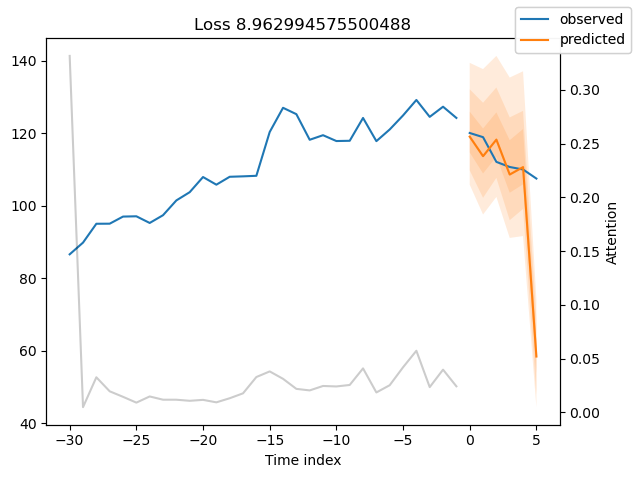

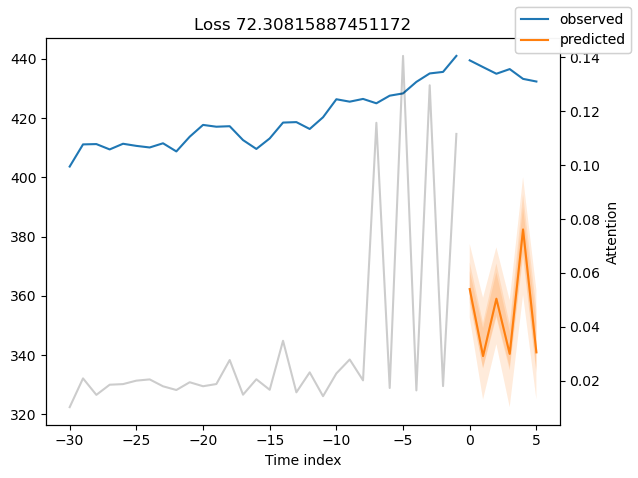

In [7]:
from pytorch_forecasting import TemporalFusionTransformer

best_model_path = trainer.trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# best_tft = trainer.best_tft()
raw_predictions = best_tft.predict(
    trainer.val_dataloader,
    mode="raw",
    return_x=True,
    fast_dev_run=False
)

for k in range(len(raw_predictions[0][0])):
    plt = best_tft.plot_prediction(
        raw_predictions.x,
        raw_predictions.output,
        idx=k, add_loss_to_title=True
    )
    plt.legend()
    plt.savefig(f"./train_images/predict-{k}.png", dpi=300)
    plt.show()
